In [18]:
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import sys

sys.path.append("../trimmingSession")
sys.path.append("~/.local/share/fonts")
from util import *
from stationUtil import *
from graph import *

In [19]:
import matplotlib.font_manager as fm

SHARE_PATH = "/usr/share/fonts"
font_name = fm.FontProperties(
    fname=f"{SHARE_PATH}/Pretendard/PretendardGOV-Medium.ttf"
).get_name()
plt.rc("font", family=font_name)

In [20]:
DF_METRIC = pd.read_json("../database/METRIC_INTEGRATED.json")
GRADE_CONDITION = [DF_METRIC["GRADE"] == g for g in (1, 2, 3, 4, 5)]
LINE_CONDITION = [DF_METRIC["LINE"] == l for l in (1, 2, 3, 4)]

In [21]:
def draw_func(LINE):
    ax = DF_METRIC[LINE_CONDITION[LINE - 1]].plot.scatter(
        x="FLUX", y="IMPLICIT", c="GRADE", colormap="RdBu"
    )
    return ax, ax.get_figure()


def get_grade(LINE, GRADE):
    arr = []
    for g in range(GRADE):
        arr.extend(
            DF_METRIC[LINE_CONDITION[LINE - 1] & GRADE_CONDITION[g - 1]].index.to_list()
        )
    arr.sort()

    return arr


def get_exclude_list(LINE, GRADE):
    sCodes = [*line_num_to_range(LINE)]
    for grade in get_grade(LINE, GRADE):
        if grade in sCodes:
            sCodes.pop(sCodes.index(grade))

    if [*line_num_to_range(LINE)][0] in sCodes:
        sCodes.pop(0)
    if [*line_num_to_range(LINE)][-1] in sCodes:
        sCodes.pop(-1)

    return sCodes


assert 0 == len(set(get_grade(1, 1)) & set(get_exclude_list(1, 1)))

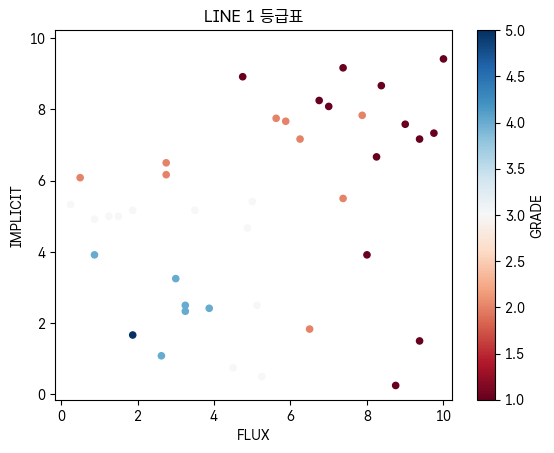

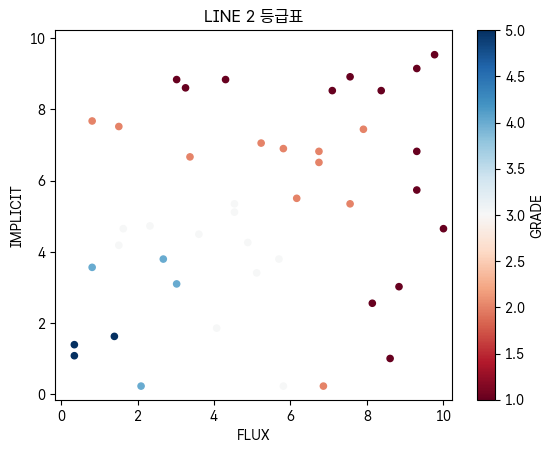

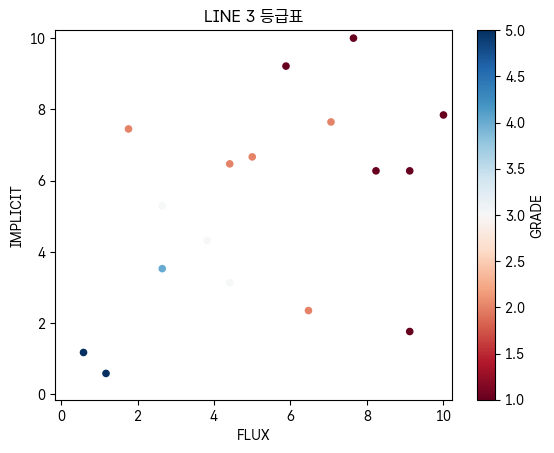

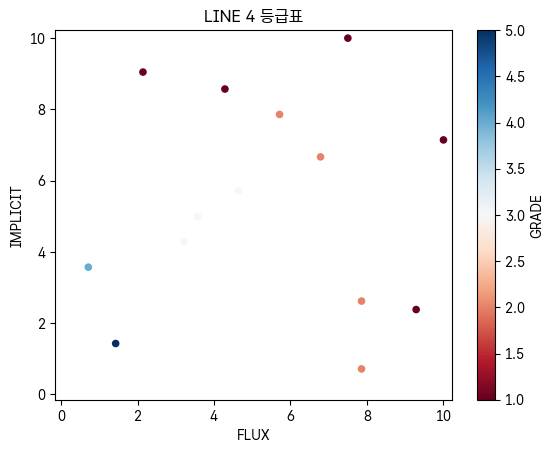

In [22]:
for line in [1,2,3,4]:
    ax, fig = draw_func(line)
    plt.xlim(-0.15,10.225)
    plt.ylim(-0.15,10.225)
    ax.set_title(f"LINE {line} 등급표")
    fig.savefig(f"line{line}_grade_scatter.svg", format="svg")